# Projet Machine Learning - TP1 - Partie 1

## A. Génération des données

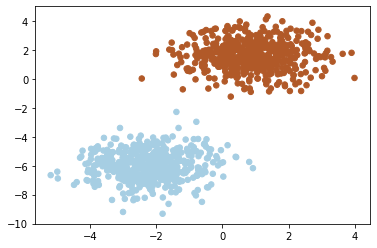

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import pickle



X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =1.0, center_box=(-10.0,10.0))



X0 = (X[:,0])
X1 = (X[:,1])

plt.scatter(X0, X1, c=y, s=30, cmap=plt.cm.Paired)

In [16]:
#Normalisation des données

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(X)

[[-1.0366551   0.72844788]
 [ 0.89065484  2.23096341]
 [ 0.99286805  2.4526879 ]
 ...
 [-3.30341784 -6.06598128]
 [-0.11741492  0.86495739]
 [-1.48995421 -4.94644012]]


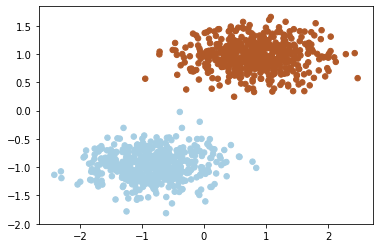

In [17]:
plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [18]:
# Application de la PCA
#from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#pca_n = pca.fit(X_norm)

#print(pca.explained_variance_ratio_)

#pca_n


## B. SVM Linéaire
### Données Linéairement séparables

In [19]:
# Application du model LinearSVC à margge stricte
from sklearn import svm, metrics
colors = np.array([x for x in "bgrcmyk"])


# On initialise C à une valeur élevée de manière à rendre notre marge plus stricte
linsvm= svm.LinearSVC(C=1000)
linsvm.fit(X_norm, y)

#évaluer le modèle 
ypred= linsvm.predict(X_norm)

#tauxd’erreur
err_train= 1 - metrics.accuracy_score(ypred, y)
print("Train error: %.3f" % err_train)

#matrice de confusion
conf = metrics.confusion_matrix(y, ypred)

Train error: 0.000


In [20]:
conf

array([[500,   0],
       [  0, 500]], dtype=int64)

500 exemples de la classe un sont reconnus en classe 1, pareil pour la classe 2

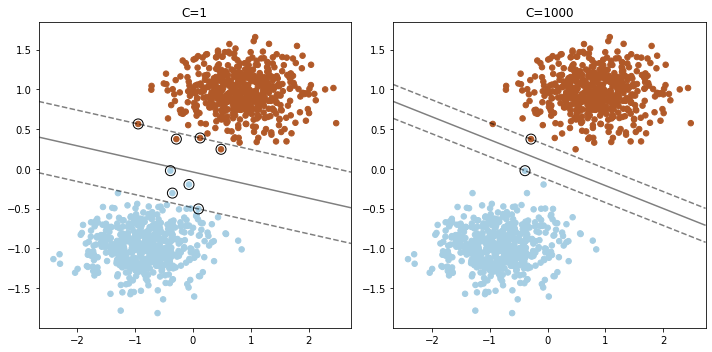

In [21]:
from sklearn.svm import LinearSVC

# Représentation des Supports vectors
plt.figure(figsize=(10, 5))

for i, C in enumerate([1, 1000]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_norm, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_norm)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_norm[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### Données non-linéairement séparables

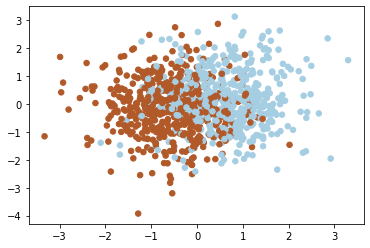

In [37]:
#On augmente l'écart-type au sein de notre distribution
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =5.0, center_box=(-10.0,10.0))

X0 = (X[:,0])
X1 = (X[:,1])

#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

#Séparation des données en train et en test
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score


print(cv)
#Le classifier sss permet de séparer la bases de données en apprentissage et en test

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None)


In [39]:
#Séparation des données en train et en test
for train_index, test_index in cv.split(X_norm, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [598 384 827 192 463 626 682 977 856 413 200 131 947 482 302 508 432 271
 884 653 550 258  79 865 951 762 859 829 281 982 170 215 177 828  73 588
 449 999 986 981 334 680 557 505 595 450 580 111 878 297 265 142  91 620
 408 279 758 472 312 433 847  25 362 478  15 499 905  84  26  47  43 310
 268 627 924 532 127 971 135 566 617 963 359 101 993 389  13 213 919 906
 619 722 799 283 612 130 733   3  12   6  52 327 742 484 950 897 367 705
 998 436 991 112  19  14 834  39 338 247 592 925 205 737 128 533 696  78
 656 524 257 945 751 520 870 296 866 934  24 546 442 519 957 703 590 443
 795  29 913 603 754 921 260 846 915 893 326 180 650 102 677 510 185 726
 808  41 843 605 675 145 346  37 174 992 802 375 418 393   9 740 781 548
 466 881 464 969  94 165   1 837 709 632 498 305 116 728 223 159 909 832
 750 995 908 929 720 262 430 840 568 967 190 816 767 738 446 601 166 129
 759 779 207 233 473  86 164 700 752 810 474 958 527 333 948 106 633 830
  38 301 637  64 118 417  87  50 110 602 298

## Pourquoi implémenter une base de validation ? 

Afin d'entrainer un model, nous devons évaluer ses performances sur des données qu'il n'a jamais vu, or il est nécessaire de pouvoir modifier nos hyper-paramètres en se basant sur une base de test, la cross-validation intervient à ce niveau en implémentant à l'interieur de la base d'apprentissage une base nommée base de validation qui aura pour but d'évaluer le modèle et de modifier ses hyper-paramètres afin de d'avoir une meilleure accuracy. La base de test sera par conséquant inutilisée jusqu'à la fin et nous permettra d'évaluer notre modèle sur des données qu'il n'aura jamais vu.  
Il faut donc entrainer notre model sur la base d'apprentissage, évaluer ses performances sur la base de validation, rectifier les hyper-paramètres et enfin évaluer le model sur la base test.

## Pourquoi faire de la cross validation ? 

Nous choisissons 5 splits, cela signifie que nous prenons 30% de notre base d'apprentissage et que nous évaluons le model sur la base de validation, nous repétons l'opération 5 fois de manière à tester le model sous toutes ses configurations possibles, l'évaluation se fera sur la moyenne des 5 résultats obtenus.

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


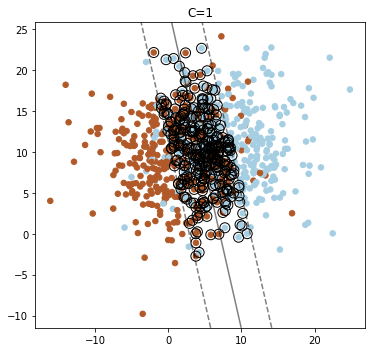

In [40]:
for i, C in enumerate([1]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()



In [41]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.798095238095238
Accuracy sur la base test : 0.77


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


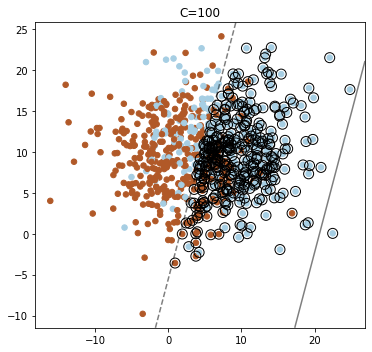

In [42]:
for i, C in enumerate([100]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()



In [43]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.6076190476190476
Accuracy sur la base test : 0.5


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


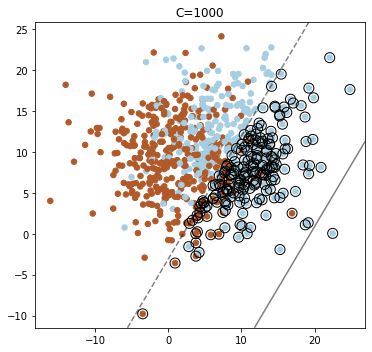

In [44]:
for i, C in enumerate([1000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [45]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.5757142857142857
Accuracy sur la base test : 0.5


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


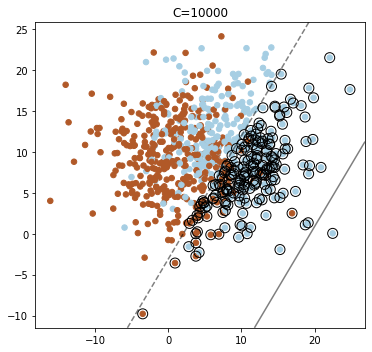

In [46]:
for i, C in enumerate([10000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [47]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.5
Accuracy sur la base test : 0.5


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


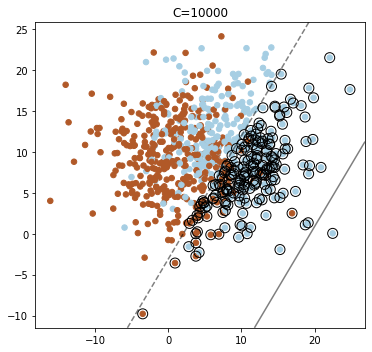

In [48]:
for i, C in enumerate([10000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [49]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.5
Accuracy sur la base test : 0.5


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

## Stockage des accuracy en tableau

In [50]:
data = {'Accuracy_train':{'C=1':70,'C=100':70,'C=1000':59,'C=10000':59,'C=100000':59},
        'Accuracy_test':{'C=1':68,'C=100':70,'C=1000':66,'C=10000':66,'C=100000':66}}
df = pd.DataFrame(data=data)
df

,Accuracy_train,Accuracy_test
C=1,70,68
C=100,70,70
C=1000,59,66
C=10000,59,66
C=100000,59,66


## Conclusion

On remarque que la capacité des SVM linéaires à séparer des données non linéairement séparables est limité, nos valeurs ici manquent de features pertinantes afin de pouvoir les classifier avec un classifieur SVM linéaire.  
On remarque que pour une marge souple comme pour une marge complexe, l'accuracy en test n'est pas élevée du à des hyperparamètres non significatifs pour la séparation de nos données.

# Partie 2 

## Support Vector Machine & Decision Trees

## C. SVM Non linéaire à noyau Gaussien

## 1.

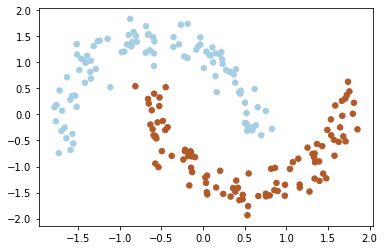

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import sklearn
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn import model_selection


X, y = make_moons(noise=0.1, random_state=1, n_samples=200)

X0 = (X[:,0])
X1 = (X[:,1])


#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

#Séparation des données en 70% train et 30% test
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [52]:
#Séparation des données en train et en test
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)



for train_index, test_index in cv.split(X_norm, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

TRAIN: [ 53   0   4 162 121 174  61  15 113  20 142  14  63  43 140  97  11 151
  60 112 141 180  22  82  68  41  80  32 115  12 111  10 169  25  95  99
  19  36  38 156 138 105 102  78 167  42  58 192 120 191  39  56   8  13
  79 165  72 149  26  23 132   6 163 155  92  55 154  83  44  64  93 196
 118  40 148 100  71 164   1  18 170 195 108 130 126 117 173 124 181  47
  29 179 135  77 103 104   7  16  62 128  59  24  33 106  66 157 107 177
 160 198 109 139 119 187 188 150 185  67 152 193  85  27 116  65 145 147
 159 199   2 134 175  49 178 176  81  50 110 168  89  52] TEST: [144 122  76  57 137  46  69 158 143 136 171  73 161 101  75  87 183  21
  86 194  51   9  37  28   3  17 184  96 186  84  34 190  90 153  88 114
 127  35  54 166  74  31 133 172  94 182 125 123  45 131   5  91  98 197
  70  48 189 129 146  30]
TRAIN: [ 90 120 116 177  95 199 159 155  97 162  76 154  23 198  59  38  24  36
  16 100  71 110  87 171  33 114 128 139  42  63 148   2 103 131  68 193
 138 122 112 145 119

## 2. Analyser l'influence du paramètre de dispertion du noyau gaussien

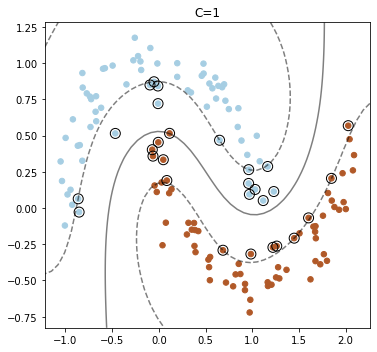

In [53]:
from sklearn import svm
for i, C in enumerate([1]):
    clf = svm.SVC(kernel = "rbf", gamma=1, C=C).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9952380952380953
Accuracy sur la base test : 0.9833333333333333


Taux erreur en train : 0.004761904761904745
Taux erreur en test : 0.01666666666666672
Nombre de support vector  :  29


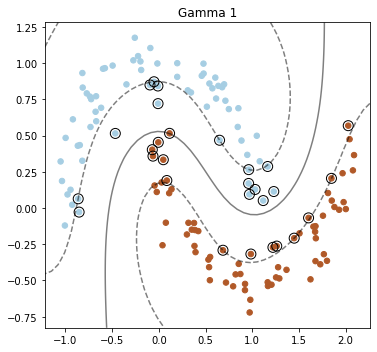

Taux erreur en train : 0.0
Taux erreur en test : 0.0
Nombre de support vector  :  22


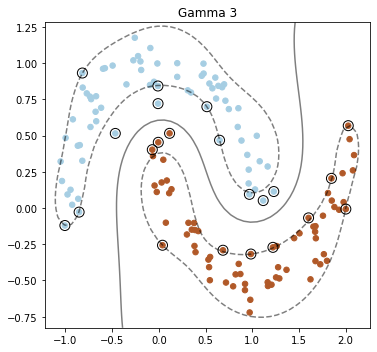

Taux erreur en train : 0.0
Taux erreur en test : 0.0
Nombre de support vector  :  24


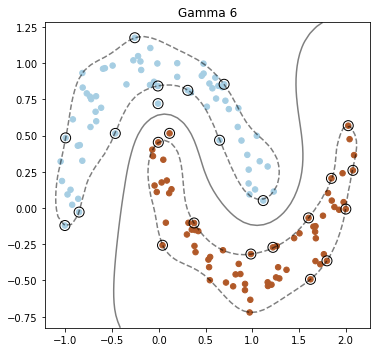

Taux erreur en train : 0.0
Taux erreur en test : 0.01666666666666672
Nombre de support vector  :  25


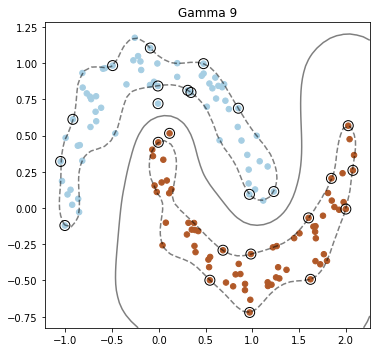

Taux erreur en train : 0.0
Taux erreur en test : 0.01666666666666672
Nombre de support vector  :  26


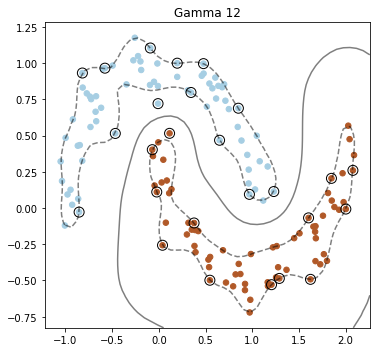

Taux erreur en train : 0.0
Taux erreur en test : 0.01666666666666672
Nombre de support vector  :  30


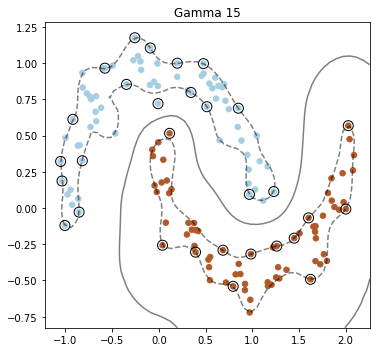

In [55]:
#Initialisation de gamma en échelle linéaire
gamma = [1,3,6,9,12,15]

#On fixe C à 1
for i, C in enumerate([1]):
    #On itère pour nos valeur de gamma
    for j in gamma:
        
        clf = svm.SVC(kernel = "rbf", gamma=j, C=C).fit(X_train, y_train)
        decision_function = clf.decision_function(X_train)

        plt.figure(figsize=(10, 5))

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        #Stockage des taux d'erreur dans te_train et te_test
        te_train = 1- cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
        te_test = 1- clf.score(X_test,y_test)
        nombre_sv = len(support_vectors[:, 0])
        

        #Affichage des taux d'erreur et des supports vecteurs
        print("Taux erreur en train :", te_train)
        print("Taux erreur en test :", te_test) 
        print("Nombre de support vector  : ", nombre_sv)
        
        

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
        plt.title("Gamma " + str(j))
        plt.tight_layout()
        plt.show()


In [56]:
#Création du tableau des taux d'erreur par rapport à gamma
data_n = {'Taux erreur Train':{'Gamma = 1': 0 ,'Gamma = 3': 0,'Gamma = 6': 0,
                               'Gamma = 9': 0,'Gamma = 12': 0,'Gamma = 15': 0},
          'Taux erreur Test':{'Gamma = 1': 1,'Gamma = 3': 0,'Gamma = 6': 0,
                              'Gamma = 9': 1,'Gamma = 12': 1,'Gamma = 15': 1},
          'Nombre de SV ' :{'Gamma = 1': 29,'Gamma = 3': 22,'Gamma = 6': 24,
                            'Gamma = 9': 25,'Gamma = 12': 26,'Gamma = 15': 30 }}
       
df_n = pd.DataFrame(data_n)        
df_n

,Taux erreur Train,Taux erreur Test,Nombre de SV
Gamma = 1,0,1,29
Gamma = 3,0,0,22
Gamma = 6,0,0,24
Gamma = 9,0,1,25
Gamma = 12,0,1,26
Gamma = 15,0,1,30


array([[1.        , 0.36946112],
       [0.36946112, 1.        ]])

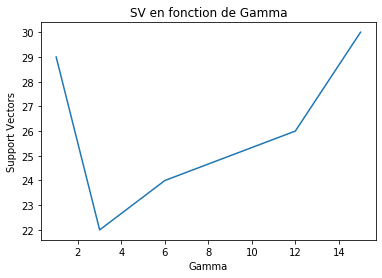

In [57]:
sv = [29,22,24,25,26,30]
plt.plot(gamma,sv)
plt.xlabel("Gamma")
plt.ylabel("Support Vectors")
plt.title("SV en fonction de Gamma")
r = np.corrcoef(gamma, sv)
r

## B - C. Conclusion

Ici, on s'apperçoit que nos exemples sont très bien classifiés avec une dispersion du gamma allant de 1 à 15, les SV augmentent avec le nombre de gamma, ici on préferera limiter le nombre de SV en choisissant un gamma = 3 ou 6. On observe que plus le gamma augmente, plus nos frontières se rapprochent de nos points et les SV augmentent, nous risquons le surraprentissage en augmentant gamma.  On peut en conclure que le plus le gamma augmente, plus le biais diminue mais la variance augmentera (overfitting), et plus celui-ci est faible, plus le biais sera élevé et la variance sera faible (underfitting).

## 3.


TRAIN: [ 53   0   4 162 121 174  61  15 113  20 142  14  63  43 140  97  11 151
  60 112 141 180  22  82  68  41  80  32 115  12 111  10 169  25  95  99
  19  36  38 156 138 105 102  78 167  42  58 192 120 191  39  56   8  13
  79 165  72 149  26  23 132   6 163 155  92  55 154  83  44  64  93 196
 118  40 148 100  71 164   1  18 170 195 108 130 126 117 173 124 181  47
  29 179 135  77 103 104   7  16  62 128  59  24  33 106  66 157 107 177
 160 198 109 139 119 187 188 150 185  67 152 193  85  27 116  65 145 147
 159 199   2 134 175  49 178 176  81  50 110 168  89  52] TEST: [144 122  76  57 137  46  69 158 143 136 171  73 161 101  75  87 183  21
  86 194  51   9  37  28   3  17 184  96 186  84  34 190  90 153  88 114
 127  35  54 166  74  31 133 172  94 182 125 123  45 131   5  91  98 197
  70  48 189 129 146  30]
TRAIN: [ 90 120 116 177  95 199 159 155  97 162  76 154  23 198  59  38  24  36
  16 100  71 110  87 171  33 114 128 139  42  63 148   2 103 131  68 193
 138 122 112 145 119

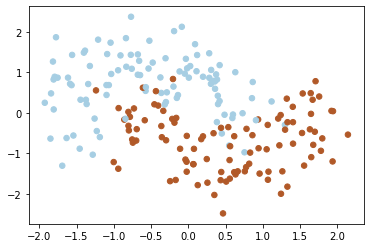

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.3, random_state=1, n_samples=200)

X0 = (X[:,0])
X1 = (X[:,1])


#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

#Séparation des données en train et en test
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

for train_index, test_index in cv.split(X_norm, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Taux erreur en train : 0.08571428571428574
Taux erreur en test : 0.08333333333333337
Nombre de support vector  :  49


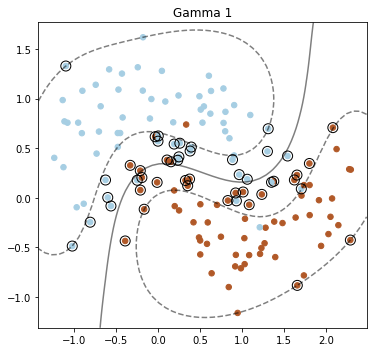

Taux erreur en train : 0.06428571428571428
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  39


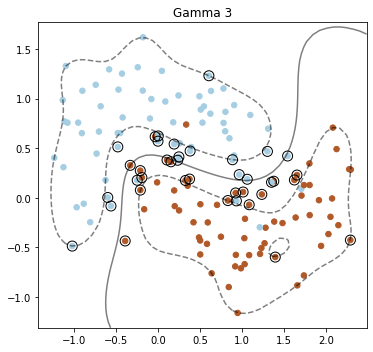

Taux erreur en train : 0.050000000000000044
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  49


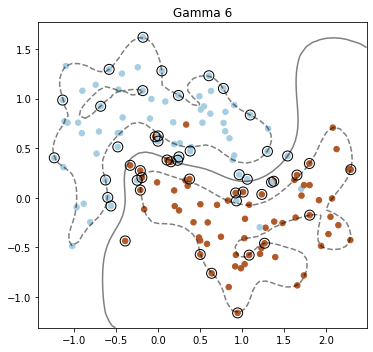

Taux erreur en train : 0.050000000000000044
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  52


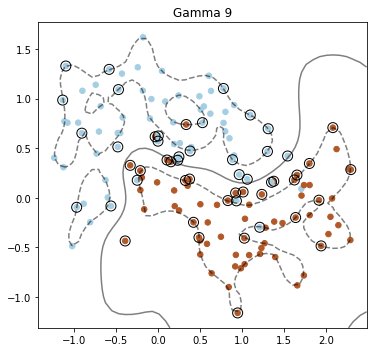

Taux erreur en train : 0.050000000000000044
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  58


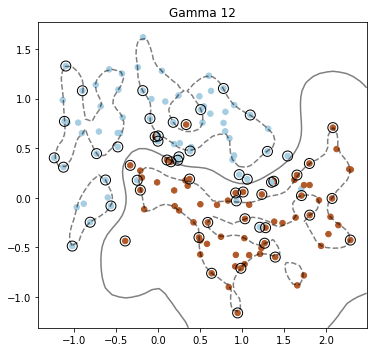

Taux erreur en train : 0.050000000000000044
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  71


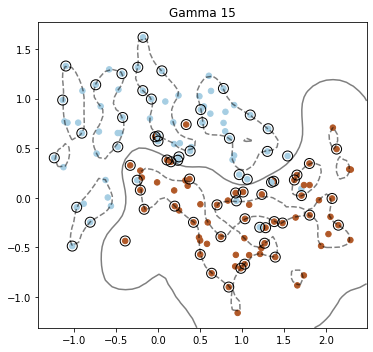

In [59]:
#Initialisation de gamma en échelle linéaire
gamma = [1,3,6,9,12,15]


for i, C in enumerate([1]):
    #On itère pour nos valeur de gamma
    for j in gamma:
        
        clf = svm.SVC(kernel = "rbf", gamma=j, C=C).fit(X_train, y_train)
        decision_function = clf.decision_function(X_train)

        plt.figure(figsize=(10, 5))

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        #Stockage des taux d'erreur dans te_train et te_test
        te_train = 1- clf.score(X_train,y_train)
        te_test = 1- clf.score(X_test,y_test)
        nombre_sv = len(support_vectors[:, 0])
        

        #Affichage des taux d'erreur et des supports vecteurs
        print("Taux erreur en train :", te_train)
        print("Taux erreur en test :", te_test) 
        print("Nombre de support vector  : ", nombre_sv)
        
        

        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
        plt.title("Gamma " + str(j))
        plt.tight_layout()
        plt.show()


In [90]:
#Création du tableau des taux d'erreur par rapport à gamma
data_ne = {'% Taux erreur Train':{'Gamma = 1': 8 ,'Gamma = 3': 6,'Gamma = 6': 5,
                               'Gamma = 9': 5,'Gamma = 12': 5,'Gamma = 15': 5},
          ' % Taux erreur Test':{'Gamma = 1': 8,'Gamma = 3': 6,'Gamma = 6': 6,
                              'Gamma = 9': 6,'Gamma = 12': 6,'Gamma = 15': 1},
          'Nombre de SV ' :{'Gamma = 1': 49,'Gamma = 3': 39,'Gamma = 6': 49,
                            'Gamma = 9': 52,'Gamma = 12': 58,'Gamma = 15': 71 }}
       
df_ne = pd.DataFrame(data_ne)        
df_ne

,% Taux erreur Train,% Taux erreur Test,Nombre de SV
Gamma = 1,8,8,49
Gamma = 3,6,6,39
Gamma = 6,5,6,49
Gamma = 9,5,6,52
Gamma = 12,5,6,58
Gamma = 15,5,1,71


array([[1.        , 0.87203959],
       [0.87203959, 1.        ]])

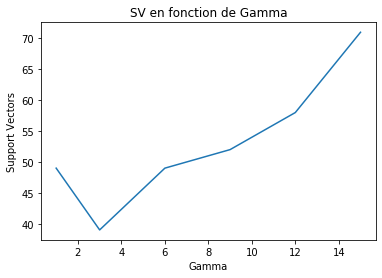

In [61]:
sv = [49,39,49,52,58,71]
plt.plot(gamma,sv)
plt.xlabel("Gamma")
plt.ylabel("Support Vectors")
plt.title("SV en fonction de Gamma")
r = np.corrcoef(gamma, sv)
r


## Observation

On observe la aussi que plus gamma augmente, plus nos frontières se rapprochent des points ce qui signifie que le biais diminue mais que la variance augmente (overffiting). On remarque aussi que plus les données sont bruitées, plus le classifieur aura besoin de SV.

## Conclusion 

Nous observons ici que plus le gamma est élevé plus nos frontières se rapprochent des points, on augmente donc le surraprentissage : biais faible mais variance élevé. D'autre part, on remarque que plus Gamma augmente, plus le nombre de support vectors augmente aussi (corrélation positive 90%) ce qui s'explique par la complexité des frontières avec l'augmentation de Gamma.

# 4. Optimisation par recherche en grille 

======================================================== Gamma 0.01 & C 0.1 ================================================
Matrice de confusion pour la base train :
[[56 14]
 [14 56]]
Taux de reconnaissance en train : 0.8
Taux erreur en train : 0.19999999999999996
Matrice de confusion pour la base test :
[[22  8]
 [10 20]]
Taux de reconnaissance en test : 0.7
Taux erreur en test : 0.30000000000000004
Nombre de support vector  :  140
5 fold cross validation Accuracy pour train :  0.7857142857142858
5 fold cross validation Accuracy pour test :  0.7500000000000001


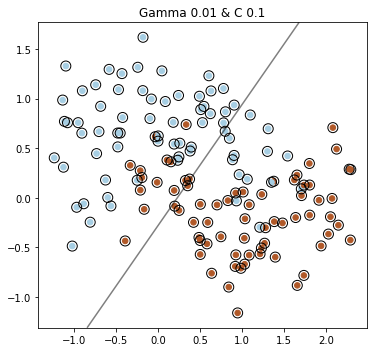

======================================================== Gamma 1 & C 0.1 ================================================
Matrice de confusion pour la base train :
[[62  8]
 [ 9 61]]
Taux de reconnaissance en train : 0.8785714285714286
Taux erreur en train : 0.12142857142857144
Matrice de confusion pour la base test :
[[26  4]
 [ 6 24]]
Taux de reconnaissance en test : 0.8333333333333334
Taux erreur en test : 0.16666666666666663
Nombre de support vector  :  95
5 fold cross validation Accuracy pour train :  0.8785714285714287
5 fold cross validation Accuracy pour test :  0.8333333333333334


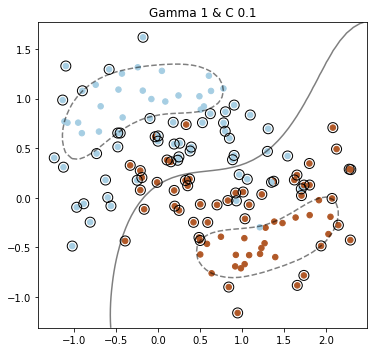

======================================================== Gamma 100.0 & C 0.1 ================================================
Matrice de confusion pour la base train :
[[67  3]
 [ 1 69]]
Taux de reconnaissance en train : 0.9714285714285714
Taux erreur en train : 0.02857142857142858
Matrice de confusion pour la base test :
[[28  2]
 [ 7 23]]
Taux de reconnaissance en test : 0.85
Taux erreur en test : 0.15000000000000002
Nombre de support vector  :  140
5 fold cross validation Accuracy pour train :  0.75
5 fold cross validation Accuracy pour test :  0.6666666666666666


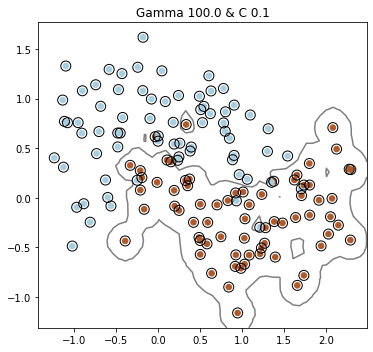

======================================================== Gamma 0.01 & C 1 ================================================
Matrice de confusion pour la base train :
[[58 12]
 [12 58]]
Taux de reconnaissance en train : 0.8285714285714286
Taux erreur en train : 0.17142857142857137
Matrice de confusion pour la base test :
[[25  5]
 [ 9 21]]
Taux de reconnaissance en test : 0.7666666666666667
Taux erreur en test : 0.23333333333333328
Nombre de support vector  :  110
5 fold cross validation Accuracy pour train :  0.8142857142857143
5 fold cross validation Accuracy pour test :  0.7500000000000001


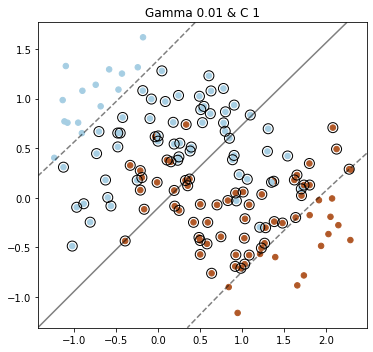

======================================================== Gamma 1 & C 1 ================================================
Matrice de confusion pour la base train :
[[64  6]
 [ 6 64]]
Taux de reconnaissance en train : 0.9142857142857143
Taux erreur en train : 0.08571428571428574
Matrice de confusion pour la base test :
[[28  2]
 [ 3 27]]
Taux de reconnaissance en test : 0.9166666666666666
Taux erreur en test : 0.08333333333333337
Nombre de support vector  :  49
5 fold cross validation Accuracy pour train :  0.9071428571428573
5 fold cross validation Accuracy pour test :  0.8833333333333334


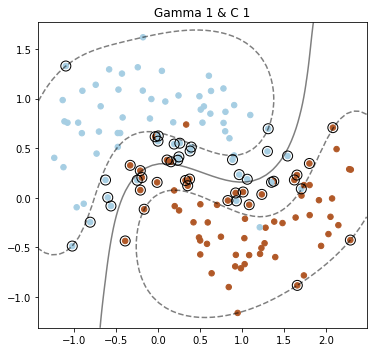

======================================================== Gamma 100.0 & C 1 ================================================
Matrice de confusion pour la base train :
[[67  3]
 [ 1 69]]
Taux de reconnaissance en train : 0.9714285714285714
Taux erreur en train : 0.02857142857142858
Matrice de confusion pour la base test :
[[27  3]
 [ 7 23]]
Taux de reconnaissance en test : 0.8333333333333334
Taux erreur en test : 0.16666666666666663
Nombre de support vector  :  77
5 fold cross validation Accuracy pour train :  0.8142857142857144
5 fold cross validation Accuracy pour test :  0.75


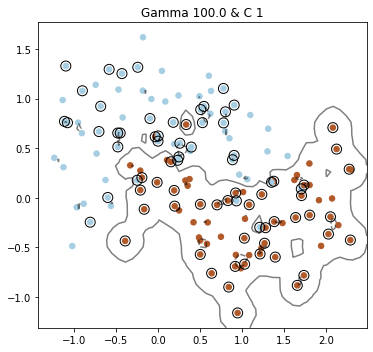

======================================================== Gamma 0.01 & C 10.0 ================================================
Matrice de confusion pour la base train :
[[62  8]
 [14 56]]
Taux de reconnaissance en train : 0.8428571428571429
Taux erreur en train : 0.15714285714285714
Matrice de confusion pour la base test :
[[26  4]
 [ 7 23]]
Taux de reconnaissance en test : 0.8166666666666667
Taux erreur en test : 0.18333333333333335
Nombre de support vector  :  63
5 fold cross validation Accuracy pour train :  0.85
5 fold cross validation Accuracy pour test :  0.8


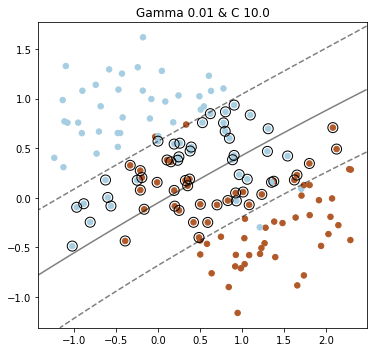

======================================================== Gamma 1 & C 10.0 ================================================
Matrice de confusion pour la base train :
[[64  6]
 [ 2 68]]
Taux de reconnaissance en train : 0.9428571428571428
Taux erreur en train : 0.05714285714285716
Matrice de confusion pour la base test :
[[28  2]
 [ 2 28]]
Taux de reconnaissance en test : 0.9333333333333333
Taux erreur en test : 0.06666666666666665
Nombre de support vector  :  29
5 fold cross validation Accuracy pour train :  0.9071428571428573
5 fold cross validation Accuracy pour test :  0.9333333333333333


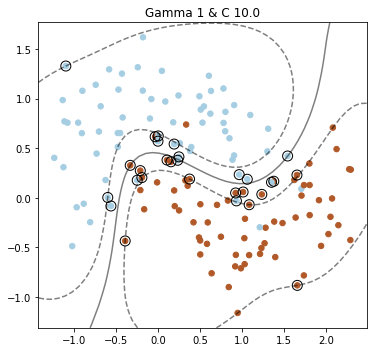

======================================================== Gamma 100.0 & C 10.0 ================================================
Matrice de confusion pour la base train :
[[70  0]
 [ 0 70]]
Taux de reconnaissance en train : 1.0
Taux erreur en train : 0.0
Matrice de confusion pour la base test :
[[27  3]
 [ 8 22]]
Taux de reconnaissance en test : 0.8166666666666667
Taux erreur en test : 0.18333333333333335
Nombre de support vector  :  65
5 fold cross validation Accuracy pour train :  0.7357142857142858
5 fold cross validation Accuracy pour test :  0.75


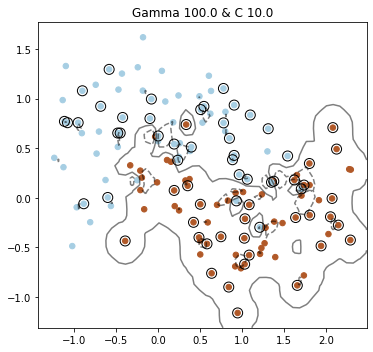

In [143]:
from sklearn.model_selection import GridSearchCV

#Initialisation de gamma en échelle linéaire
gamma = [1e-2, 1, 1e2]
C_range = [1e-1,1,1e1]


for C in C_range:
    #On itère pour nos valeur de gamma
    for j in gamma:
        
        clf = svm.SVC(kernel = "rbf", gamma=j, C=C).fit(X_train, y_train)
        decision_function = clf.decision_function(X_train)
        plt.figure(figsize=(10, 5))

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X_train[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        #Calcul matrice de confusion 
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        
        #Stockage des taux d'erreur dans te_train et te_test
        te_train = 1- clf.score(X_train,y_train)
        te_test = 1- clf.score(X_test,y_test)
        nombre_sv = len(support_vectors[:, 0])
        
        #Affichage des résultats avec les validations croisées à 5 plis
        cross_val_train = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean()
        cross_val_test = cross_val_score(clf, X_test, y_test, cv=5, scoring="accuracy").mean()
    
        

        #Affichage des taux d'erreur et des supports vecteurs
        print("========================================================","Gamma " + str(j) + " & C " + str(C),"================================================" ) 
        
        
        print("Matrice de confusion pour la base train :")
        print(metrics.confusion_matrix(y_train, y_pred_train))
        print("=============================================================================================================================")
        print("Taux de reconnaissance en train :", clf.score(X_train,y_train)) 
        print("Taux erreur en train :", te_train)
        print("=============================================================================================================================")
        print("Matrice de confusion pour la base test :")
        print(metrics.confusion_matrix(y_test, y_pred_test))
        print("=============================================================================================================================")
        print("Taux de reconnaissance en test :", clf.score(X_test,y_test))
        print("Taux erreur en test :", te_test) 
        print("=============================================================================================================================")
        print("Nombre de support vector  : ", nombre_sv)
        print("=============================================================================================================================")
        print("5 fold cross validation Accuracy pour train : ", cross_val_train)
        print("5 fold cross validation Accuracy pour test : ", cross_val_test)
        
        
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
        plt.title("Gamma " + str(j) + " & C " + str(C))
        plt.tight_layout()
        plt.show()


In [91]:
#Création du tableau des taux d'erreur par rapport à gamma
data_new = {'G = 0.01 & C = 0.1':{'% Taux erreur Train' : 49,'% Taux erreur Test' : 51,'Support Vectors' : 138},
          'G = 1 & C = 0.1':{'% Taux erreur Train' : 9,'% Taux erreur Test' : 13,'Support Vectors' : 103},
          'G = 100 & C = 0.1' :{'% Taux erreur Train' : 49,'% Taux erreur Test' : 51,'Support Vectors' : 134},
           'G = 0.01 & C = 1':{'% Taux erreur Train' : 18,'% Taux erreur Test' : 12,'Support Vectors' : 93},
          'G = 1 & C = 1':{'% Taux erreur Train' : 5,'% Taux erreur Test' : 8,'Support Vectors' : 42},
          'G = 100 & C = 0.1' :{'% Taux erreur Train' : 0,'% Taux erreur Test' : 16,'Support Vectors' : 79},
           'G = 0.01 & C = 10':{'% Taux erreur Train' : 17,'% Taux erreur Test' : 12,'Support Vectors' : 58},
          'G = 1 & C = 10':{'% Taux erreur Train' : 5,'% Taux erreur Test' : 9,'Support Vectors' : 27},
          'G = 100 & C = 10' :{'% Taux erreur Train' : 0,'% Taux erreur Test' : 23,'Support Vectors' : 87}}
       
df_new = pd.DataFrame(data_new)        
df_new

,G = 0.01 & C = 0.1,G = 1 & C = 0.1,G = 100 & C = 0.1,G = 0.01 & C = 1,G = 1 & C = 1,G = 0.01 & C = 10,G = 1 & C = 10,G = 100 & C = 10
% Taux erreur Train,49,9,0,18,5,17,5,0
% Taux erreur Test,51,13,16,12,8,12,9,23
Support Vectors,138,103,79,93,42,58,27,87


## 4. A - B - Optimisation par recherche en grille

The best parameters are {'C': 0.1, 'gamma': 1.0} with a score of 0.93
======================================================== Gamma 0.1 & C 0.01 ================================================
Matrice de confusion pour la base train :
[[57 13]
 [14 56]]
Taux de reconnaissance en train : 0.8785714285714286
Taux erreur en train : 0.12142857142857144
Matrice de confusion pour la base test :
[[25  5]
 [10 20]]
Taux de reconnaissance en test : 0.8333333333333334
Taux erreur en test : 0.16666666666666663
Nombre de support vector  :  65
5 fold cross validation Accuracy pour train :  0.8071428571428572
5 fold cross validation Accuracy pour test :  0.7666666666666668
======================================================== Gamma 1 & C 0.01 ================================================
Matrice de confusion pour la base train :
[[62  8]
 [12 58]]
Taux de reconnaissance en train : 0.8785714285714286
Taux erreur en train : 0.12142857142857144
Matrice de confusion pour la base test :
[[26  4]
 

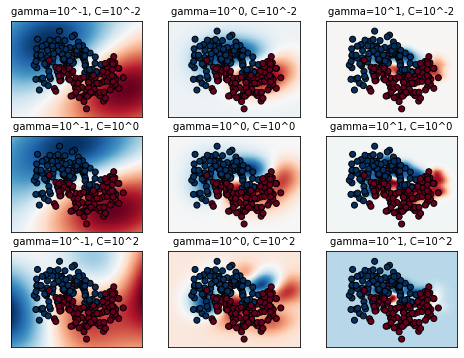

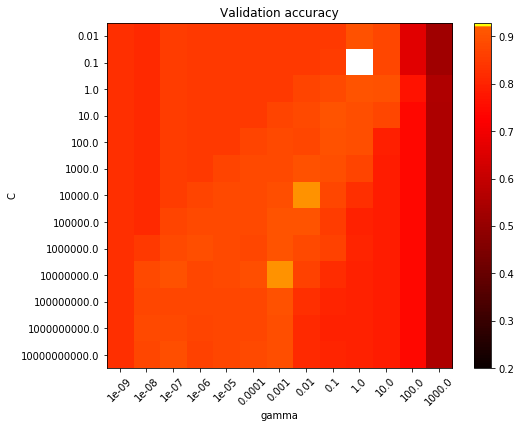

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# #############################################################################
# Train classifiers
#

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        
        #Calcul matrice de confusion 
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        
        #Stockage des taux d'erreur dans te_train et te_test
        te_train = 1- grid.score(X_train,y_train)
        te_test = 1- grid.score(X_test,y_test)
        nombre_sv = len(support_vectors[:, 0])
 
        #Affichage des résultats avec les validations croisées à 5 plis
        cross_val_train = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean()
        cross_val_test = cross_val_score(clf, X_test, y_test, cv=5, scoring="accuracy").mean()
        
        print("========================================================","Gamma " + str(gamma) + " & C " + str(C),"================================================" ) 
        print("Matrice de confusion pour la base train :")
        print(metrics.confusion_matrix(y_train, y_pred_train))
        print("=============================================================================================================================")
        print("Taux de reconnaissance en train :", grid.score(X_train, y_train))
        print("Taux erreur en train :", te_train)
        print("=============================================================================================================================")
        print("Matrice de confusion pour la base test :")
        print(metrics.confusion_matrix(y_test, y_pred_test))
        print("=============================================================================================================================")
        print("Taux de reconnaissance en test :",  grid.score(X_test,y_test))
        print("Taux erreur en test :", te_test) 
        print("=============================================================================================================================")
        print("Nombre de support vector  : ", nombre_sv)
        print("=============================================================================================================================")
        print("5 fold cross validation Accuracy pour train : ", cross_val_train)
        print("5 fold cross validation Accuracy pour test : ", cross_val_test)
        

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Observations

On observe que les meilleurs valeurs de Gamma et C en Validation sont G = 1 et C = 0.1, on en déduit qu'il n'est pas nécessaire d'appliquer une couche strice afin de séparer des données bruitées, il n'est pas nécéssaire d'appliquer un grand Gamma aussi.  On remarque que plus Gamma et C sont grands, plus notre model est en sur-apprentissage (biais faible variance elevée). Nous observons aussi que plus la marge est large, plus le nombre de SV est important, ce qui est normal selon nous car plus le classifieur utilise des données éloignées afin de séparer des données, plus celui-ci prendra en compte de points qui se rapprochent de la marge.  

On en conclut que dans le cas d'un schéma de données lunaires dont le but est de séparer 2 classes avec un bruit élevé, l'utilisation d'un SVM Gaussien est efficace lorsque la marge est souple avec une faible valeur de gamma, ces paramètres n'ont pas besoin d'être très grand pour ce cas.

# D. Arbres de décision

C:\Users\Rudyl\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


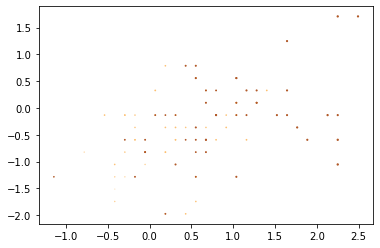

In [198]:
#Charger les données
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

plt.scatter(X_norm[:,0], X_norm[:,1],X_norm[:,2] ,c=y, cmap=plt.cm.Paired)

#Séparation des données en train et en test
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


In [199]:
# Dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1. Séparation des données

In [200]:
for train_index, test_index in cv.split(X_norm, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [144 117 115  22  28  38  57 111  91 112  45  56  98  58   1   7 135  69
  80 119 131  96   4  31  93  82   5  63 137 143 140  83 126 132   8  10
  13  73  33  15 130  62 138  16  27  32  52  75  26  95  79  60 108  41
  76  77  87  71 148  11  74 146  84  66 128  94 118  48  59 125 106 124
 145  17 107  40  49 104  97  20  30  25  42  14  92 105 122 116  35 101
   2  18  70  64  72  53  43 114 133  29 127  78  34 120 141] TEST: [136 142  39  44  50  23  90 149  46  55  21 147  47 123  67 134  68  65
  51   0  54 103  24  81 129 102 113 100  89 110  99  19   6  88  86 121
  85  37   9  61  36 109   3  12 139]
TRAIN: [102  11 121 119 108 131  52 101  93  91 149  70 126  34 113  66  20  92
  90 141  75  31  81  57  62  99 100 107  74   7 118  67  63  18 146 138
   6  56 148  10  40   5  96   4  14  49  37  83  86  95 115 140 103  59
  41 128  45   8  44  24  71   2  39  55 144 114  64 139  47  13 111  43
  38 134 135 112  51 106 132  33 110 142  69 105  98  23  73  35   3  53
  82

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy")

In [202]:
#Entrainement de l'arbe
clf.fit(X_train, y_train)
print(cross_val_score(clf, X_train, y_train, cv=cv).mean())
print(cross_val_score(clf, X_test, y_test, cv=cv).mean())

0.91875
0.9571428571428571


In [203]:
#Création du tableau des taux d'erreur par rapport à gamma
data_tree = {'Max_depth = 1':{'% Accuracy en Train' : 65,'% Accuracy en Test' : 64},
          'Max_depth = 2':{'% Accuracy en Train' : 90,'% Accuracy en Test' : 98},
          'Max_depth = 3' :{'% Accuracy en Train' : 94,'% Accuracy en Test' : 95},
           'Max_depth = 4':{'% Accuracy en Train' : 93,'% Accuracy en Test' : 95},
          'Max_depth = 5':{'% Accuracy en Train' : 91,'% Accuracy en Test' : 95},
          'Max_depth = 6' :{'% Accuracy en Train' : 94,'% Accuracy en Test' : 95}}
       
df_tree = pd.DataFrame(data_tree)        
df_tree

,Max_depth = 1,Max_depth = 2,Max_depth = 3,Max_depth = 4,Max_depth = 5,Max_depth = 6
% Accuracy en Train,65,90,94,93,91,94
% Accuracy en Test,64,98,95,95,95,95


In [204]:
#Création du tableau des taux d'erreur par rapport à gamma
data_tree_split = {'Min_samples_split = 2':{'% Accuracy en Train' : 94,'% Accuracy en Test' : 95},
          'Min_samples_split = 5':{'% Accuracy en Train' : 93,'% Accuracy en Test' : 95},
          'Min_samples_split = 10' :{'% Accuracy en Train' : 92,'% Accuracy en Test' : 95},
           'Min_samples_split = 20':{'% Accuracy en Train' : 92,'% Accuracy en Test' : 98},
          'Min_samples_split = 30':{'% Accuracy en Train' : 90,'% Accuracy en Test' : 64},
          'Min_samples_split = 35' :{'% Accuracy en Train' : 91,'% Accuracy en Test' : 28}}
       
df_tree_split = pd.DataFrame(data_tree_split)        
df_tree_split

,Min_samples_split = 2,Min_samples_split = 5,Min_samples_split = 10,Min_samples_split = 20,Min_samples_split = 30,Min_samples_split = 35
% Accuracy en Train,94,93,92,92,90,91
% Accuracy en Test,95,95,95,98,64,28


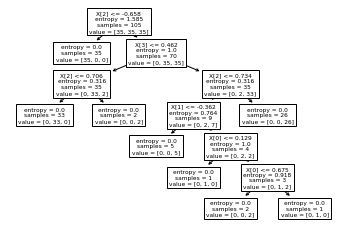

In [205]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

## Observations pour max_depth

Ce paramètre permet d'approfondir les couches de l'arbre de décision, plus il sera haut, plus les séparations entre features sera possible.

Lorsqu'on autorise l'arbre de décision à n'avoir qu'une seule couche, on s'apperçoit que les résultats sont faibles, avec peu de variance et un haut biais -> Sous-apprentissage

Lorsqu'on autorise l'arbre de décision à avoir deux et trois couches, on s'apperçoit que les résultats de classifications sont meilleurs avec peu de variance entre nos résultats et peux de biais -> Bon apprentissage

Lorsqu'on autorise l'arbre de décision à avoir plus de 3 couches, on s'apperçoit que les résultats de classifications sont correct mais avec un peu plus de variance, le biais augmente -> Risque de sur-apprentissage difficile à conclure ici.

## Observations min_samples_split

Ce paramètre permet de mettre un critère sur la séparation des données entre 2 couches, si le nombre d'échantillon est inférieur au critère, il n'y à pas de classification par la suite.

On observe qu'avec un haut critère (30) dans notre cas, que les scores d'accuracy sont très faibles. On observe aussi une faible variance dans ce cas, on en déduit qu'un haut critère permet de réduire la variance.

On observe de meilleurs résultats avec un critère fixé à 20.

On observe qu'avec un plus petit critère, il est possible d'augmenter le nombre de couche car nous nous retrouvons dans certains cas avec des samples faibles.


## Observations sur le biais et la variance

On remarque dans notre cas que pour limiter le sur-apprentissage, il est nécessaire d'avoir une profondeur d'arbre pas très élevée avec un critère de split plus haut. 

Avec un faible critère et un grande profondeur d'arbre nous risquons le sur-apprentissage.

Avec un critère trop haut et un nombre de couche trop bas, le modèle est en sous-apprentissage.

Afin d'avoir un bon modèle, il est nécessaire d'équilibrer notre critère de split et la profondeur d'arbre dans le but de limiter sous et sur-apprentissage.

## Optimisation des paramètres par recherche en grille

The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2} with a score of 0.95


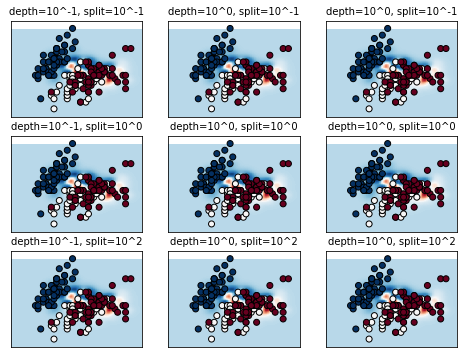

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# #############################################################################
# Train classifiers
#

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

split_range = np.logspace(2,75)
depth_range = np.logspace(1,6)

params = {"max_depth": [1, 6],
          "min_samples_split": [2, 5, 10, 20, 30, 35],
          "criterion": ["entropy"]}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=cv)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

split_2d_range = [0.1, 1, 100]
depth_2d_range = [0.1, 1, 6]

classifiers = []

for split in split_2d_range:
    for depth in depth_2d_range:
        
        clf = DecisionTreeClassifier(criterion = "entropy")
        clf.fit(X_train, y_train)
        classifiers.append((split, depth, clf))


# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (split, depth, clf)) in enumerate(classifiers):
    

    # visualize decision function for these parameters
    plt.subplot(len(split_2d_range), len(depth_2d_range), k + 1)
    plt.title("depth=10^%d, split=10^%d" % (np.log10(depth), np.log10(split)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')


# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.


In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 2)

#Entrainement de l'arbe
clf.fit(X_train, y_train)
print('Train accuracy :', cross_val_score(clf, X_train, y_train, cv=cv).mean())
print('Test accuracy :',cross_val_score(clf, X_test, y_test, cv=cv).mean())

Train accuracy : 0.9428571428571428
Test accuracy : 0.9777777777777779


## Observation

On observe que pour 6 couches de profondeurs et 2 échantillons de split minimum, les résultats en validation sont de 95 % d'accuracy et de 97% d'accuracy en test, selon la grille on en déduit que ces paramètres sont les meilleurs.